In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sudoku/sudoku.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/sudoku/sudoku.csv')
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [5]:
df.columns

Index(['quizzes', 'solutions'], dtype='object')

In [6]:
print("Shape:", df.shape)

Shape: (1000000, 2)


In [7]:
print("Columns:", df.columns)

Columns: Index(['quizzes', 'solutions'], dtype='object')


In [8]:
# Length of each puzzle
df['quiz_length'] = df['quizzes'].apply(len)
df['solution_length'] = df['solutions'].apply(len)

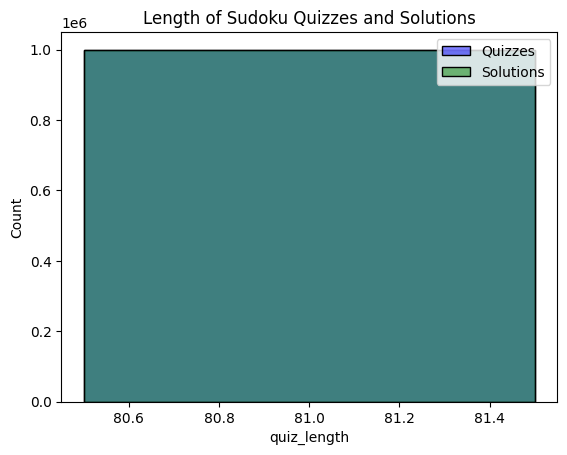

In [9]:
# Visualize length distribution
sns.histplot(df['quiz_length'], color='blue', label='Quizzes', kde=True)
sns.histplot(df['solution_length'], color='green', label='Solutions', kde=True)
plt.legend()
plt.title("Length of Sudoku Quizzes and Solutions")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convert strings to arrays of digits
X = df['quizzes'].apply(lambda x: [int(i) for i in x]).tolist()
y = df['solutions'].apply(lambda x: [int(i) for i in x]).tolist()

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [11]:
# One-hot encode output labels (0–9)
lb = LabelBinarizer()
lb.fit(range(10))
y = np.array([lb.transform(row) for row in y])  # Shape: (n_samples, 81, 10)

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential([
    tf.keras.Input(shape=(81,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(810, activation='softmax'),     # 81 cells × 10 classes
    Reshape((81, 10))                     # reshape output to (81 positions × 10 classes)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-10-03 09:52:16.645306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759485136.872353      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759485136.940601      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-03 09:52:30.627054: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 810)            │       415,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 81, 10)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 720,170 (2.75 MB)

 Trainable params: 720,170 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 97s 17ms/step - accuracy: 0.1893 - loss: 2.0457 - val_accuracy: 0.3220 - val_loss: 1.7195
Epoch 2/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.3320 - loss: 1.6969 - val_accuracy: 0.3529 - val_loss: 1.6493
Epoch 3/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 89s 16ms/step - accuracy: 0.3601 - loss: 1.6374 - val_accuracy: 0.3726 - val_loss: 1.6086
Epoch 4/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.3768 - loss: 1.6014 - val_accuracy: 0.3822 - val_loss: 1.5866
Epoch 5/5
5625/5625 ━━━━━━━━━━━━━━━━━━━━ 90s 16ms/step - accuracy: 0.3826 - loss: 1.5863 - val_accuracy: 0.3832 - val_loss: 1.5809


In [15]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.3831 - loss: 1.5811
Test Accuracy: 38.32%


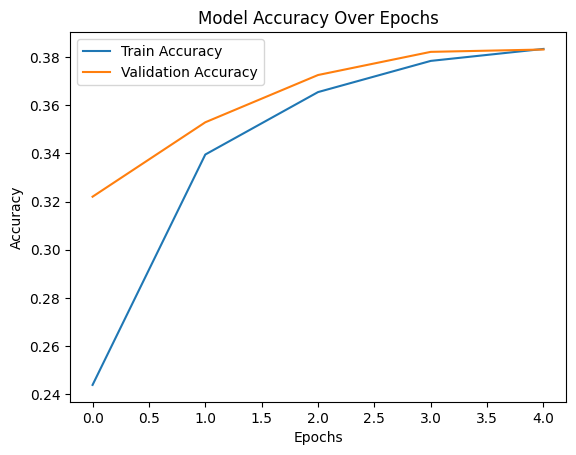

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
# Predict a sample Sudoku
sample_index = 0
sample = X_test[sample_index].reshape(1, -1)
pred = model.predict(sample)

# Decode prediction
predicted_digits = np.argmax(pred, axis=2).flatten()
original_quiz = X_test[sample_index].flatten()
actual_solution = np.argmax(y_test[sample_index], axis=1)

# Show puzzle and predicted solution
print("Original Puzzle:")
print(np.array(original_quiz).reshape(9, 9))

print("\nPredicted Solution:")
print(np.array(predicted_digits).reshape(9, 9))

print("\nActual Solution:")
print(np.array(actual_solution).reshape(9, 9))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Original Puzzle:
[[0 0 4 0 0 0 0 0 8]
 [7 0 0 2 0 9 0 0 6]
 [0 1 0 0 8 0 4 5 0]
 [8 0 0 0 6 0 5 0 0]
 [0 7 9 0 0 4 0 0 1]
 [0 0 1 0 0 5 2 3 9]
 [0 0 0 6 0 2 9 0 0]
 [3 0 8 0 5 7 0 2 0]
 [0 0 6 4 0 0 1 0 3]]

Predicted Solution:
[[7 2 4 1 5 1 9 9 8]
 [7 1 1 5 3 9 1 7 6]
 [9 2 1 3 8 2 4 5 1]
 [9 2 1 9 6 1 5 7 1]
 [5 6 9 8 2 4 1 2 2]
 [3 1 2 9 3 5 4 4 9]
 [3 5 2 6 1 3 9 7 5]
 [4 3 8 9 2 7 2 3 5]
 [4 9 6 4 9 8 6 7 4]]

Actual Solution:
[[6 2 4 5 1 3 7 9 8]
 [7 8 5 2 4 9 3 1 6]
 [9 1 3 7 8 6 4 5 2]
 [8 3 2 9 6 1 5 4 7]
 [5 7 9 3 2 4 8 6 1]
 [4 6 1 8 7 5 2 3 9]
 [1 4 7 6 3 2 9 8 5]
 [3 9 8 1 5 7 6 2 4]
 [2 5 6 4 9 8 1 7 3]]
